In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [29]:
# from fastai.imports import *

# from fastai.transforms import *
# from fastai.conv_learner import *
# from fastai.model import *
# from fastai.dataset import *
# from fastai.sgdr import *
# from fastai.plots import *

# PATH = "../data/"
# ARCH = resnext50
# BATCH = 16

import numpy as np
import os
import shutil
import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import StratifiedKFold

np.random.seed(123)

PATH = "../data/"

In [30]:
train = pd.read_csv(f"{PATH}train.csv")
test = pd.read_csv(f"{PATH}sample_submission.csv")

In [31]:
train.head()

fname         label  manually_verified
0  00044347.wav        Hi-hat                  0
1  001ca53d.wav     Saxophone                  1
2  002d256b.wav       Trumpet                  0
3  0033e230.wav  Glockenspiel                  1
4  00353774.wav         Cello                  1

In [32]:
print(f"Num of Training Samples: {train.shape[0]}, Num of Classes: {len(train.label.unique())}")

Num of Training Samples: 9473, Num of Classes: 41


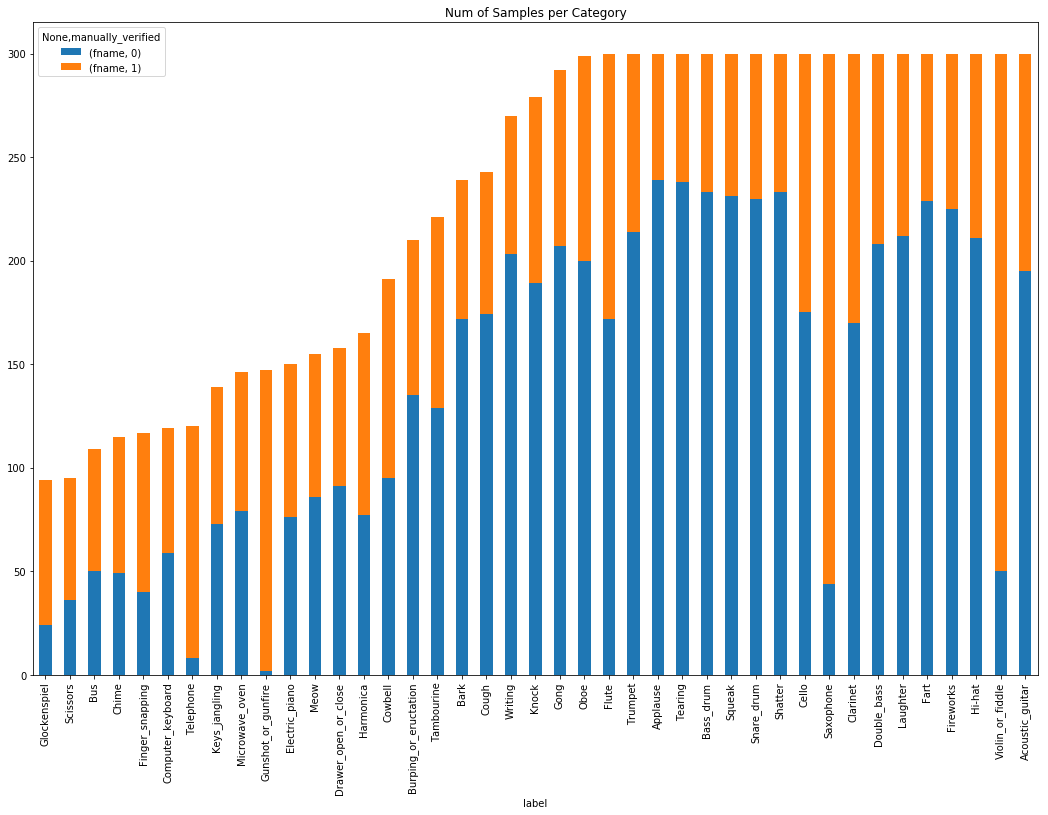

In [33]:
categories = train.groupby(['label', 'manually_verified']).count()
catplot = categories.unstack().reindex(
    categories.unstack().sum(axis = 1).sort_values().index
).plot(
    kind = 'bar',
    stacked = True,
    title = 'Num of Samples per Category',
    figsize = (18, 12)
)

In [34]:
import IPython.display as ipd
file = f"{PATH}audio_train/00044347.wav"
ipd.Audio(file)

In [35]:
import wave
wav = wave.open(file)
print(f"Sampling/Frame rate: {wav.getframerate()}")
print(f"Total Samples: {wav.getnframes()}")
print(f"Duration: {wav.getnframes()/wav.getframerate()}")

Sampling/Frame rate: 44100
Total Samples: 617400
Duration: 14.0


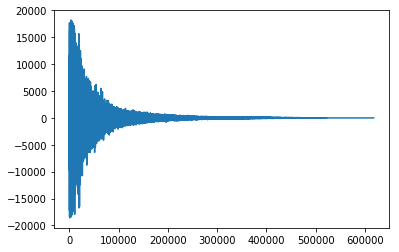

In [36]:
from scipy.io import wavfile

rate, data = wavfile.read(file)
plt.plot(data, "-")

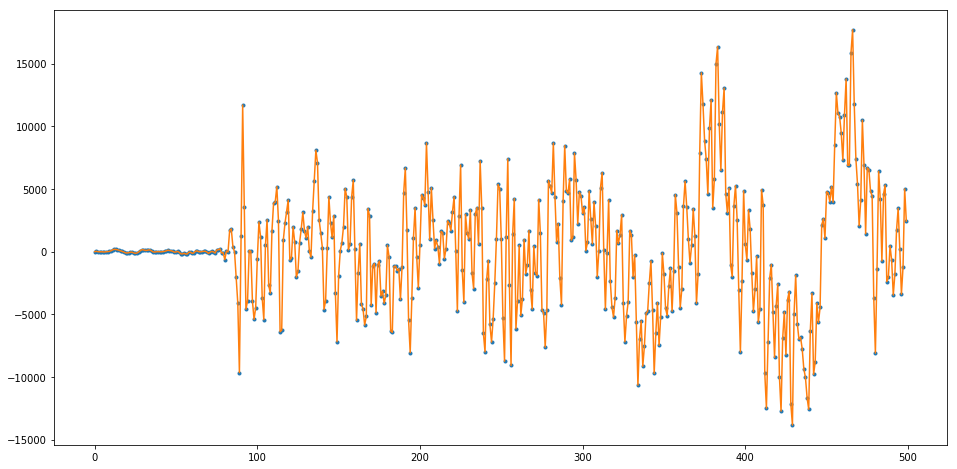

In [37]:
plt.figure(figsize=(16, 8))
plt.plot(data[:500], '.'); plt.plot(data[:500], '-');

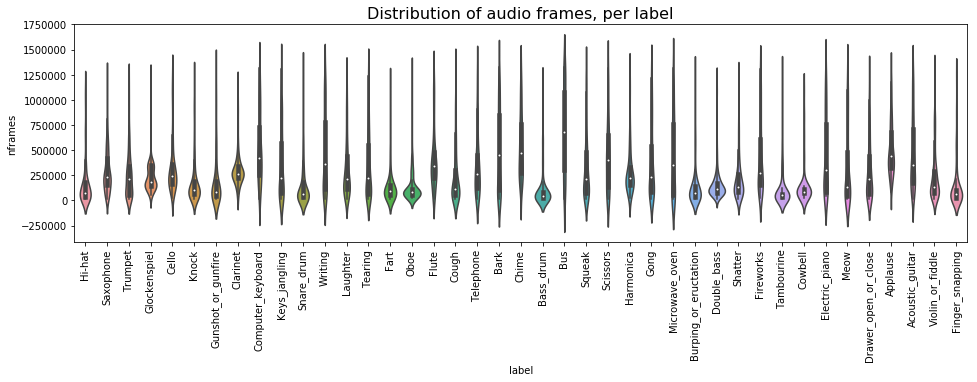

In [39]:
train['nframes'] = train['fname'].apply(lambda f: wave.open('../data/audio_train/' + f).getnframes())
test['nframes'] = test['fname'].apply(lambda f: wave.open('../data/audio_test/' + f).getnframes())

_, ax = plt.subplots(figsize=(16, 4))
sns.violinplot(ax=ax, x="label", y="nframes", data=train)
plt.xticks(rotation=90)
plt.title('Distribution of audio frames, per label', fontsize=16)
plt.show()

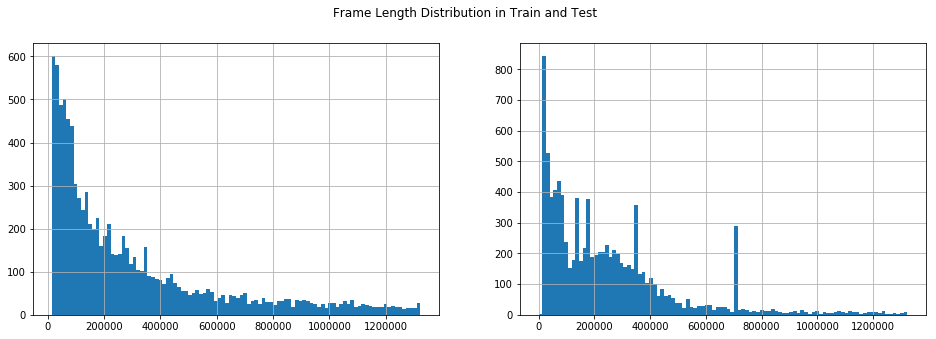

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
train.nframes.hist(bins=100, ax=axes[0])
test.nframes.hist(bins=100, ax=axes[1])
plt.suptitle('Frame Length Distribution in Train and Test', ha='center', fontsize='large');